In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Dowload a WMT as jpg

The tiles download are those covering Amsterdam, Netherlands. The WMTS is provided by [pdok](https://www.pdok.nl/introductie/-/article/luchtfoto-pdok).

In [2]:
from io import BytesIO

import ogr
from owslib.wmts import WebMapTileService
from PIL import Image

from building_detector import helpers

wmts_url = 'https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wmts'
layer_name = 'Actueel_ortho25'

In [3]:
wmts = WebMapTileService(wmts_url, version='1.1.1')
wmts.identification.title

'Landelijke Voorziening Beeldmateriaal'

In [4]:
print('The WMTS contains the following layers:')
wmts.contents

The WMTS contains the following layers:


{'2016_ortho25': <owslib.wmts.ContentMetadata at 0x7feab096e7c0>,
 '2017_ortho25': <owslib.wmts.ContentMetadata at 0x7feab096eac0>,
 '2018_ortho25': <owslib.wmts.ContentMetadata at 0x7feab096eaf0>,
 '2019_ortho25': <owslib.wmts.ContentMetadata at 0x7feab0972040>,
 'Actueel_ortho25': <owslib.wmts.ContentMetadata at 0x7feab0972310>}

Get the bounding box from a gml, see [notebook](download-wfs-as-gml.ipynb).

In [5]:
muni = 'Amsterdam'
file_path = f'../data/{muni}.gml'.lower()
driver = ogr.GetDriverByName('GML')
gml = driver.Open(file_path, 0)
xmin, xmax, ymin, ymax = helpers.get_layer_extent(gml.GetLayer())
xmin, xmax, ymin, ymax

(110188.384, 134029.81, 476770.797, 493893.636)

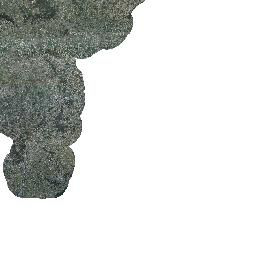

In [6]:
tile = wmts.gettile(
    layer=layer_name, 
    tilematrixset='EPSG:28992', 
    tilematrix='2', 
    row=2,
    column=2, 
    format="image/jpeg"
)

image_bytes = BytesIO()
image_bytes.write(tile.read())
image = Image.open(image_bytes)
image

In [7]:
# Save to file
with open(f'../data/{muni}.jpg'.lower(), 'wb') as f:
    f.write(tile.read())